
# Adding a background map to plots 

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
[contextily](https://github.com/darribas/contextily) package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).




In [1]:
%matplotlib inline
import geopandas

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



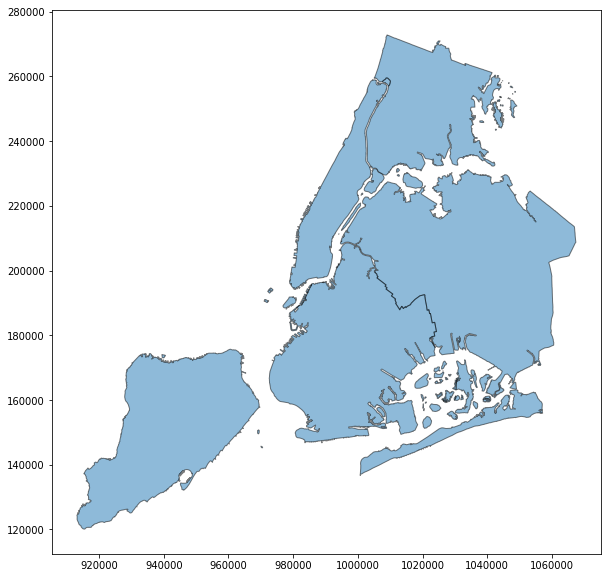

In [2]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

## Convert the data to Web Mercator


Web map tiles are typically provided in
[Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator)
([EPSG 3857](https://epsg.io/3857)), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [3]:
df = df.to_crs(epsg=3857)

## Contextily helper function

We define a small helper function that uses
`contextily <https://github.com/darribas/contextily>`__ to add a map
as background to an existing plot: 



In [4]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

Add background tiles to plot
============================

Now we can use the above function to easily add a background map to our
plot. The `zoom` keyword is required and let's you specify the detail of the
map tiles (be careful to not specify a too high `zoom` level, as this can
result in a large download):



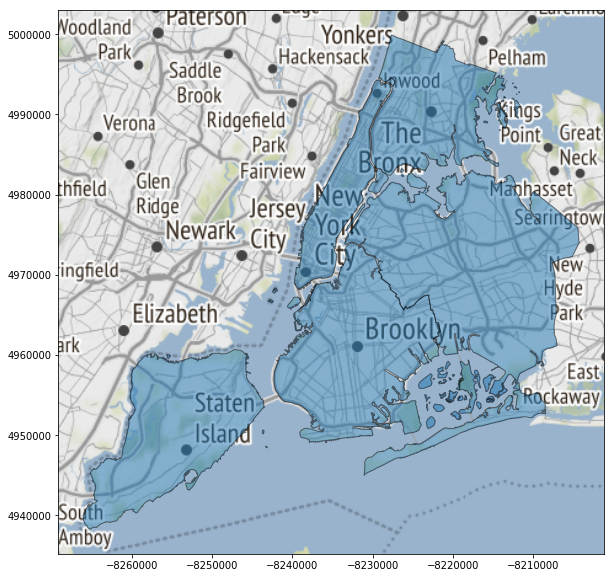

In [5]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.sources``:



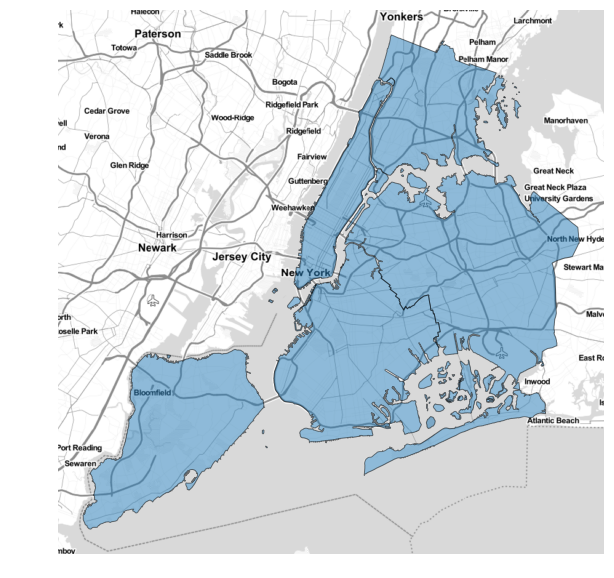

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()